<a href="https://colab.research.google.com/github/szsavery/DSPS_SSavery/blob/main/HW4/MWrotCurve_Savery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 461/661

# testing the "significance" of Dark Matter

In [1]:
#package I will use for constants and units conversion
import astropy
from astropy.constants import G

#package used to display latex formuale
from IPython.display import Latex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v\propto\frac{1}{r}$ from Newton's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

### Solving for v

Initial equation for force from gravity, $F = \frac{GMm}{r^2}$. Assuming the orbiting body is in freefall, net acceleration on the body is then 0. Therefore, $F_{grav} = F_{cent}$ for the orbiting body.
$$⇒ \frac{GMm}{r^2} = \frac{mv^2}{r}$$. Next need to perform some algebra so that the velocity term is all by itself on oneside of the equation.
$$⇒ \frac{GMm}{r} = mv^2 ⇒ \frac{GM}{r} = v^2$$
$$⇒ v = \sqrt{\frac{GM}{r}}.$$
Giving the equation for velocity that was wanted.

## M31 rotational curve

### data ingestion
( I store the original paper as a link on another computer now I have to find it again :-( - sorry I will updat the reference )

Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [2]:
m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/m31.csv', names = ['R(kpc)','V(km/s)','St.dev.','St.error'], skiprows = 2)

In [3]:
m31.head()

,R(kpc),V(km/s),St.dev.,St.error
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [4]:
print(m31.iloc[0])
print(m31.iloc[4])

R(kpc)        0.100
V(km/s)     183.939
St.dev.       0.000
St.error      0.000
Name: 0, dtype: float64
R(kpc)        0.207
V(km/s)     210.188
St.dev.       3.943
St.error      3.258
Name: 4, dtype: float64


In [5]:
print(m31.iloc[0][0])
print(m31.iloc[4][0])

0.1
0.207


In [6]:
print(m31['R(kpc)'][0])

0.1


In [7]:
mwdf = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/mw.csv', names = ['R(kpc)','V(km/s)','St.dev.','St.error'], skiprows = 2)

In [8]:
mwdf.head()

,R(kpc),V(km/s),St.dev.,St.error
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


# exploratory data analysis
proceed with at least a few basic exploratory tasks

In [9]:
m31.describe()

,R(kpc),V(km/s),St.dev.,St.error
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


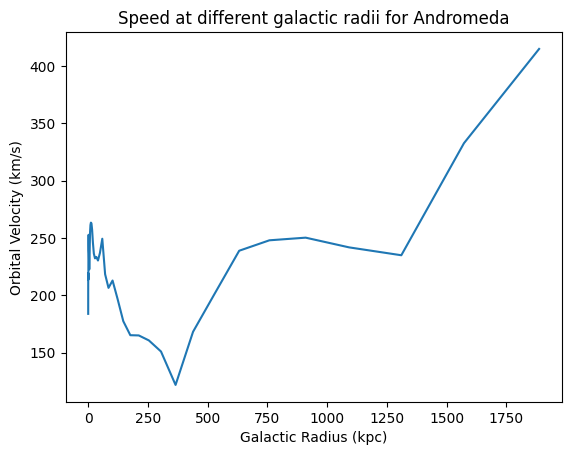

In [10]:
#General Plot
plt.plot(m31['R(kpc)'],m31['V(km/s)'], label = 'Speed at different galactic radii')
plt.xlabel('Galactic Radius (kpc)')
plt.ylabel('Orbital Velocity (km/s)')
plt.title('Speed at different galactic radii for Andromeda')
plt.show()

###Figure 1:

This plot shows the orbital velocity of Andromeda at different distances from its center. The plot helps to highlight where a good radius cut in the data may occur at, such as $≈ 300 kpc$ as this appears to be where the minimum velocity occurs in the dataset.

In [11]:
mwdf.describe()

,R(kpc),V(km/s),St.dev.,St.error
count,64.000000,64.000000,64.000000,64.000000
mean,142.281500,187.101219,48.249063,19.003297
std,348.144773,52.161901,41.255286,23.513466
min,0.010000,93.042000,3.370000,0.868000
25%,0.177250,138.676250,12.585500,2.709750
50%,3.133500,204.576000,35.288500,13.923000
75%,55.298250,235.920500,68.412750,24.791250
max,1682.532000,255.300000,165.096000,110.484000


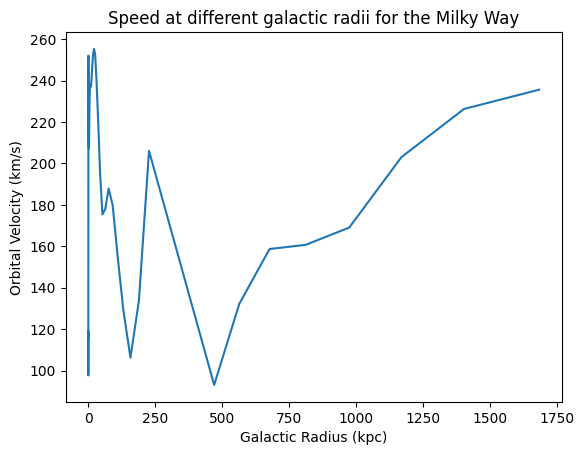

In [12]:
plt.plot(mwdf['R(kpc)'],mwdf['V(km/s)'], label = 'Speed at different galactic radii')
plt.xlabel('Galactic Radius (kpc)')
plt.ylabel('Orbital Velocity (km/s)')
plt.title('Speed at different galactic radii for the Milky Way')
plt.show()

### Figure 2:

Plotting the orbital velocity at different radii for the Milky Way. This plot is much less smooth than the one for Andromeda. Again the plot suggests that making a cut in the data right before 500 kpc in radius could be prudent. Comparing these two plots, seems to show that the Milky way is $≈ 150$ kpc larger than Andromeda. It also appears that the maximum velocity seen within the galaxies themselves is in the region of $260 \frac{km}{s}$, suggesting a possible galactic speed limit that is shared between spiral type galaxies.

from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   


In [13]:
apparentSizeM31 = 3.167

In [14]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)))

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [15]:
distance = 2.54*(10**6)*u.lightyear
dist_error = 0.14*(10*6)*u.lightyear

print(distance)
print(dist_error)

2540000.0 lyr
8.4 lyr


In [16]:
#Converting to Kpc
convert = (1*u.kiloparsec)/(3261.56*u.lightyear)
print(convert)

0.0003066017488563755 kpc / lyr


In [17]:
distkpc = distance.to(u.kiloparsec)
errorkpc = dist_error.to(u.kiloparsec)

print(distkpc)
print(errorkpc)

778.7675402152985 kpc
0.002575451707798625 kpc


In [18]:
#Manual conversion, before realizing the to() function could do it
dist_kpc = distance*convert
dist_error_kpc = dist_error*convert

print(dist_kpc)
print(dist_error_kpc)

778.7684420951938 kpc
0.0025754546903935544 kpc


In [19]:
print("Distance to Andromeda: "+ r"{:.3f} +/- {:2.3f}".format(distkpc,errorkpc))

Distance to Andromeda: 778.768 kpc +/- 0.003 kpc


Print the distance like I printed the angular size.

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).


In [20]:
#Shar pointed out that we need to half this size to get radius, originally was getting the diameter
m31Size = distkpc * np.sin(m31angS) / 2
m31SizeError = errorkpc * np.sin(m31angS) / 2

In [21]:
print("Size of the visible component of Andromeda: " +
      r"{:.4f} +/- {:2.4f}".format(m31Size, m31SizeError))


Size of the visible component of Andromeda: 21.5121 kpc +/- 0.0001 kpc


### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [22]:
print(m31.iloc[-1])

R(kpc)      1887.071
V(km/s)      414.942
St.dev.       69.579
St.error      27.931
Name: 54, dtype: float64


In [23]:
m31_lum_mass = m31[m31['R(kpc)'] >= m31Size]

In [24]:
m31_lum_mass.describe()

,R(kpc),V(km/s),St.dev.,St.error
count,25.000000,25.000000,25.000000,25.000000
mean,448.149360,221.101360,97.763200,26.720320
std,525.677089,59.439113,40.427891,15.017164
min,23.738000,121.974000,11.729000,1.580000
25%,70.880000,177.521000,74.793000,18.733000
50%,211.647000,230.444000,105.727000,24.657000
75%,631.976000,238.973000,132.456000,36.195000
max,1887.071000,414.942000,147.835000,54.110000


In [25]:
print("The smallest radius of Andromeda containing the luminous mass is: " +
      r"{:.2f} kpc".format(m31_lum_mass.iloc[0][0]))

print("The velocity at this radius is: " +
      r"{:.2f} km/s".format(m31_lum_mass.iloc[0][1]))

The smallest radius of Andromeda containing the luminous mass is: 23.74 kpc
The velocity at this radius is: 236.51 km/s


We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower.

write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [26]:
# first measurement including all mass
def getradii(data, N, size_lum):
  '''
  The inputs for this function are the galactic dataset, the N radius I'm looking for, and radius conatining the entire luminous mass
  This function outputs the radius, velocity, dv, and error at a galactic radius of N*(radius containing the luminous mass).
  '''

  New_radius = N * size_lum
  new_data = data[data['R(kpc)'] >= New_radius]

  return new_data.iloc[0][0],new_data.iloc[0][1], new_data.iloc[0][2], new_data.iloc[0][3]

In [27]:
distance, speed, deviation, error = getradii(m31, 1, m31Size)

print(distance)
print(speed)
print(deviation)
print(error)

23.738
236.511
11.729
1.58


In [28]:
disttest, speedtest, devtest, errortest = getradii(m31,40,m31Size)

print(disttest)
print(speedtest)
print(devtest)
print(errortest)

910.046
250.377
141.353
22.663


### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

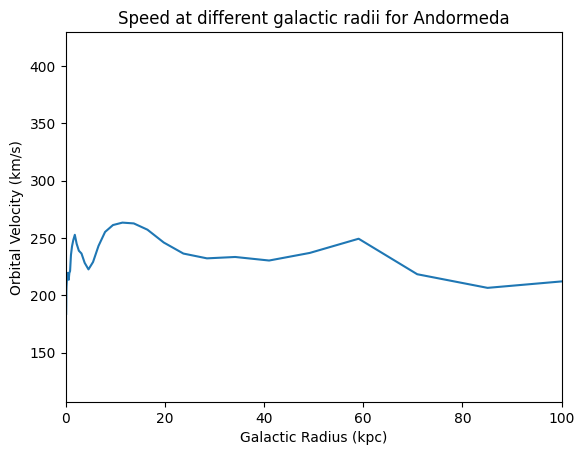

In [29]:
#Test graph

plt.plot(m31['R(kpc)'],m31['V(km/s)'], label = 'Speed at different galactic radii')
plt.xlabel('Galactic Radius (kpc)')
plt.ylabel('Orbital Velocity (km/s)')
plt.title('Speed at different galactic radii for Andormeda')
plt.xlim(0,100)
plt.show()

### Figure 3:

A test plot showing what the velocity versus radius graph looks like for Andromeda. Trying to make sure the shape matches that seen in Fed's example.

In [30]:
dist1, speed1, dev1, error1 = getradii(m31, 1, m31Size)
dist2, speed2, dev2, error2 = getradii(m31, 2, m31Size)
dist3, speed3, dev3, error3 = getradii(m31, 3, m31Size)

In [31]:
print(dist2)
print(dist3)

49.222
70.88


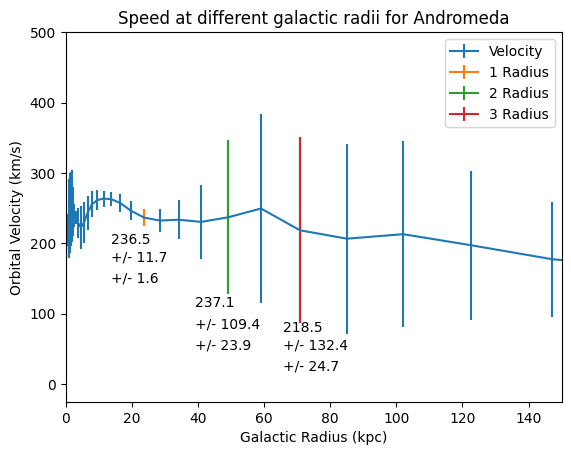

In [32]:
plt.errorbar(m31['R(kpc)'], m31['V(km/s)'], yerr = m31['St.dev.'], label = 'Velocity')
plt.errorbar(dist1, speed1, yerr= dev1, label = '1 Radius')
plt.errorbar(dist2, speed2, yerr= dev2, label = '2 Radius')
plt.errorbar(dist3, speed3, yerr = dev3, label = '3 Radius')
plt.xlabel('Galactic Radius (kpc)')
plt.ylabel('Orbital Velocity (km/s)')
plt.title('Speed at different galactic radii for Andromeda')
#Plot text positioning code from Tali
plt.text(dist1-10,200,r"{:.1f}".format(speed1))
plt.text(dist1-10,175,"+/- {:.1f}".format(dev1))
plt.text(dist1-10,145, "+/- {:.1f}".format(error1))
plt.text(dist2-10,110,r"{:.1f}".format(speed2))
plt.text(dist2-10,80,"+/- {:.1f}".format(dev2))
plt.text(dist2-10,50, "+/- {:.1f}".format(error2))
plt.text(dist3-5,75,r"{:.1f}".format(speed3))
plt.text(dist3-5,50,"+/- {:.1f}".format(dev3))
plt.text(dist3-5,20, "+/- {:.1f}".format(error3))
plt.xlim(0,150)
plt.ylim(-25,500)
plt.legend()
plt.show()

### Figure 4:

The plot of velocity versus radius with dv errorbars for Andromeda. The 3 highlighted points are showing the velocity and errors seen at 1, 2, and 3 times the luminous mass radius respectively. Can see a slow decline in velocity when comparing the first 2 points to the last one. Interestingly, the velocity doesn't seem to be declining between N = 1 and N = 2. This shows that mass of the galaxy isn't being accounted for in its entirety by just the luminous mass.

Write a function that for a given dataset and a given luminous radius and a given N
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius,
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/r$
  
Your function should print

     - the expected ratio based on the radii,
     - the calculated ratio using ```dv```, and its uncertainty, -
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio,
  5) and the same using ```err```  instead of ```dv```

In [33]:
#Finding mass of Andromeda
Mass_m31 = 0.8*10**12 * u.solMass
m31_mass_kg = Mass_m31.to(u.kilogram) / u.kilogram

print(m31_mass_kg)

1.590727896558441e+42


In [34]:
Big_G = 6.674 * 10**(-11)

In [35]:
def vratios(data, N_list, lum_radius, mass): #N_list has 2 values, where one is N = 1
  '''
  The inputs for this function are the galactic dataset, a list containing the 2 N radii I want to compare, the radius containing the entire
  luminous mass of the galaxy, and the galactic mass

  The output of this function prints the radius of the galaxy at the two N*(luminous radius) points, the expected change in velocity between these two
  radii, the actual change in velocity between the radii, and the ratio between the expected and actual velocities.
  '''
  velocity_list = []
  radius_list = []
  error_list = []
  dv_list = []

  for i in range(0,len(N_list)):
    radius, velocity, dv, error = getradii(data,N_list[i],lum_radius)

    velocity_list.append(velocity)
    radius_list.append(radius)
    error_list.append(error)
    dv_list.append(dv)

  radius1 = radius_list[0]*u.kiloparsec
  radius2 = radius_list[1]*u.kiloparsec
  radius_first = radius1.to(u.m) / u.m
  radius_second = radius2.to(u.m) / u.m


  expected_velo_change = np.sqrt((Big_G*mass)/radius_first) - np.sqrt((Big_G*mass)/radius_second)
  actual_velo_change = velocity_list[0] - velocity_list[1]
  ratio = expected_velo_change / actual_velo_change

  return print("The radius of the galaxy "+r"{:.1f}".format(N_list[0])+" times the luminous radius is "+r"{:.1f} kpc".format(radius_list[0]),
               "\n The radius of the galaxy "+r"{:.1f}".format(N_list[1])+" times the luminous radius is "+r"{:.1f} kpc".format(radius_list[1]),
               "\n The expected change in velocity between these two radii is: "+r"{:.3f} km/s".format(expected_velo_change),
               "\n The actual change in velocity between these two radii is: "+r"{:.1f} km/s".format(actual_velo_change),
               "\n The ratio in expected velocity and actual velocity is: "+r"{:.1f}".format(ratio))



In [36]:
#Test to make sure it's acting as expected
vratios(m31,[1,1.5],m31Size, m31_mass_kg)

The radius of the galaxy 1.0 times the luminous radius is 23.7 kpc 
 The radius of the galaxy 1.5 times the luminous radius is 34.2 kpc 
 The expected change in velocity between these two radii is: 63448.242 km/s 
 The actual change in velocity between these two radii is: 3.0 km/s 
 The ratio in expected velocity and actual velocity is: 21284.2


### Discuss!

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

https://en.wikipedia.org/wiki/Milky_Way
    

In [37]:
mwdf.describe()

,R(kpc),V(km/s),St.dev.,St.error
count,64.000000,64.000000,64.000000,64.000000
mean,142.281500,187.101219,48.249063,19.003297
std,348.144773,52.161901,41.255286,23.513466
min,0.010000,93.042000,3.370000,0.868000
25%,0.177250,138.676250,12.585500,2.709750
50%,3.133500,204.576000,35.288500,13.923000
75%,55.298250,235.920500,68.412750,24.791250
max,1682.532000,255.300000,165.096000,110.484000


In [38]:
mw_lum_radius = 26.8 *u.kiloparsec
mw_rad_error = 1.1*u.kiloparsec

mw_mass_sol = 1.15*(10**12)*u.solMass
mw_mass_kg = mw_mass_sol.to(u.kilogram)
print(mw_mass_kg)

2.2866713513027586e+42 kg


In [39]:
vratios(mwdf,[1,1.5],mw_lum_radius, mw_mass_kg)

The radius of the galaxy 1.0 times the luminous radius is 30.5 kpc 
 The radius of the galaxy 1.5 times the luminous radius is 43.9 kpc 
 The expected change in velocity between these two radii is: 67140.615 kg(1/2) km/s 
 The actual change in velocity between these two radii is: 44.8 km/s 
 The ratio in expected velocity and actual velocity is: 1497.6 kg(1/2)


In [40]:
mwdist1, mwspeed1, mwdev1, mwerror1 = getradii(mwdf, 1, mw_lum_radius)
mwdist2, mwspeed2, mwdev2, mwerror2 = getradii(mwdf, 2, mw_lum_radius)
mwdist3, mwspeed3, mwdev3, mwerror3 = getradii(mwdf, 3, mw_lum_radius)

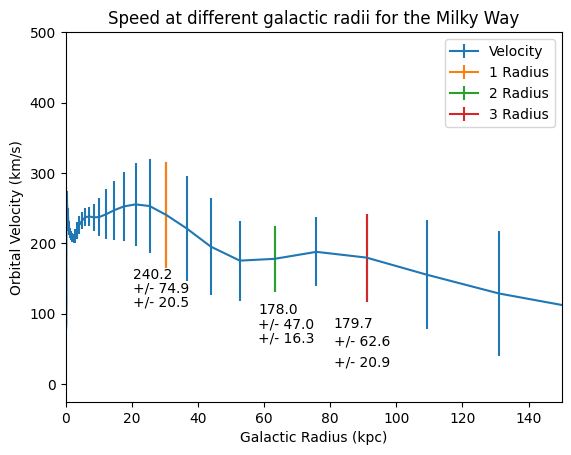

In [41]:
plt.errorbar(mwdf['R(kpc)'], mwdf['V(km/s)'], yerr = mwdf['St.dev.'], label = 'Velocity')
plt.errorbar(mwdist1, mwspeed1, yerr= mwdev1, label = '1 Radius')
plt.errorbar(mwdist2, mwspeed2, yerr= mwdev2, label = '2 Radius')
plt.errorbar(mwdist3, mwspeed3, yerr = mwdev3, label = '3 Radius')
plt.xlabel('Galactic Radius (kpc)')
plt.ylabel('Orbital Velocity (km/s)')
plt.title('Speed at different galactic radii for the Milky Way')
#Plot text positioning code from Tali
plt.text(mwdist1-10,150,r"{:.1f}".format(mwspeed1))
plt.text(mwdist1-10,130,"+/- {:.1f}".format(mwdev1))
plt.text(mwdist1-10,110, "+/- {:.1f}".format(mwerror1))
plt.text(mwdist2-5,100,r"{:.1f}".format(mwspeed2))
plt.text(mwdist2-5,80,"+/- {:.1f}".format(mwdev2))
plt.text(mwdist2-5,60, "+/- {:.1f}".format(mwerror2))
plt.text(mwdist3-10,80,r"{:.1f}".format(mwspeed3))
plt.text(mwdist3-10,55,"+/- {:.1f}".format(mwdev3))
plt.text(mwdist3-10,25, "+/- {:.1f}".format(mwerror3))
plt.xlim(0,150)
plt.ylim(-25,500)
plt.legend()
plt.show()

### Figure 5:

Plot of velocity versus radius with dv errors for the Milky Way. Again the 3 highlighted points are for 1, 2, 3 times the luminous mass radius respectively. This graph shows that the orbitial velocity is dropping faster for the Milky Way than Andromeda, which fits with the Milky Way having a much smaller luminous radius when compared to Andromeda. So, the Milky Way's mass is more compactly held than that of Andromeda.
